In [ ]:
import os
import datetime as dt
from datetime import datetime

In [ ]:
import sqlite3
import csv
from sqlalchemy import create_engine
import pandas as pd
import sqlite3
from sqlalchemy import create_engine

In [ ]:
conn = sqlite3.connect('my_data.db')
c = conn.cursor()


In [ ]:
#c.execute('''CREATE TABLE users (Id int ,Title text ,Body text,Tags text)''')

OperationalError: ignored

In [ ]:
import sqlite3
conn=sqlite3.connect('a.db')
c=conn.cursor()
c.execute('CREATE TABLE x (id int,name text)')
f=pd.read_csv('',engine='python')
f.to_sql('x',conn,if_exists='append')
c.execute('SELECT * FROM x').fetchall()

In [ ]:
# load the data into a Pandas DataFrame
users = pd.read_csv('/content/sample_data/Train.csv',engine='python')
# write the data to a sqlite table
users.to_sql('users', conn, if_exists='append', index = False)

In [ ]:
pd.read_sql('''SELECT * FROM users''', conn)

,Id,Title,Body,Tags
0,1.0,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2.0,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3.0,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4.0,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5.0,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
...,...,...,...,...
4194295,NaN,None,None,None
4194296,NaN,None,None,None
4194297,NaN,None,None,None
4194298,NaN,None,None,None


In [ ]:
a=pd.read_sql('SELECT count(*) FROM users',conn)

In [ ]:
print(a['count(*)'].values[0])

1048575


In [ ]:
c.execute('''SELECT * FROM users''').fetchall() 

[(1,
  'How to check if an uploaded file is an image without mime type?',
  "<p>I'd like to check if an uploaded file is an image file (e.g png, jpg, jpeg, gif, bmp) or another file. The problem is that I'm using Uploadify to upload the files, which changes the mime type and gives a 'text/octal' or something as the mime type, no matter which file type you upload.</p>\n\n<p>Is there a way to check if the uploaded file is an image apart from checking the file extension using PHP?</p>\n",
  'php image-processing file-upload upload mime-types'),
 (2,
  'How can I prevent firefox from closing when I press ctrl-w',
  '<p>In my favorite editor (vim), I regularly use ctrl-w to execute a certain action. Now, it quite often happens to me that firefox is the active window (on windows) while I still look at vim (thinking vim is the active window) and press ctrl-w which closes firefox. This is not what I want. Is there a way to stop ctrl-w from closing firefox?</p>\n\n<p>Rene</p>\n',
  'firefox'),


In [ ]:
df_no_dup=pd.read_sql_query('SELECT Title,Body,Tags,COUNT(*) as cnt_dup FROM users GROUP BY Title ,Body,Tags',conn)
df_no_dup.head()

,Title,Body,Tags,cnt_dup
0,None,None,None,1046927
1,"""Scrambled"" webkit scrollbar (trying to reprod...",<p>I'm trying to reproduce google+'s scrollbar...,css css3 webkit scrollbar pseudo-class,1
2,"""Selecting"" or ""Wrapping"" an IQueryable so tha...",<p>I have a Class / API that uses an <code>IQu...,c# .net linq linq-to-entities iqueryable,1
3,"""undefined"" on line 0",<p>I have a Magento controller with a block an...,css magento,1
4,'Global' may not respond to '+setShow',<p>hai\n I am new iphone. In my application ...,iphone,1


In [ ]:
#Creating db file from csv
#Learn SQL: https://www.w3schools.com/sql/default.asp
if not os.path.isfile('train.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 190
    j = 0
    index_start = 1
    for df in pd.read_csv('/content/sample_data/Train.csv', names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

FileNotFoundError: ignored

In [ ]:
con = sqlite3.connect('train.db')

In [ ]:
if os.path.isfile('train.db'):
    #start = datetime.now()
    con = sqlite3.connect('train.db')
    num_rows = pd.read_sql_query("""SELECT count(*) FROM users""", con)
    #Always remember to close the database
    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    #print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

DatabaseError: ignored

In [ ]:
num_rows['count(*)'].values[0]

134900

In [ ]:
#Learn SQl: https://www.w3schools.com/sql/default.asp
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    df_no_dup = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM data GROUP BY Title, Body, Tags', con)
    #con.close()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the first to genarate train.db file")

Please download the train.db file from drive or run the first to genarate train.db file


In [ ]:
df_no_dup.shape[0]

1649

In [ ]:
df_no_dup.head(1650)
# we can observe that there are duplicates

,Title,Body,Tags,cnt_dup
0,None,None,None,1046927
1,"""Scrambled"" webkit scrollbar (trying to reprod...",<p>I'm trying to reproduce google+'s scrollbar...,css css3 webkit scrollbar pseudo-class,1
2,"""Selecting"" or ""Wrapping"" an IQueryable so tha...",<p>I have a Class / API that uses an <code>IQu...,c# .net linq linq-to-entities iqueryable,1
3,"""undefined"" on line 0",<p>I have a Magento controller with a block an...,css magento,1
4,'Global' may not respond to '+setShow',<p>hai\n I am new iphone. In my application ...,iphone,1
...,...,...,...,...
1644,willRotateToInterfaceOrientation not being cal...,<p>My whole app is portrait. When you tap an i...,ios ios6,1
1645,"window.onload works fine with aspx page, but n...",<p>could someone please explain to me why wind...,javascript asp.net javascript-events onload xh...,1
1646,windows 2003 server slow access,<p>I have a Windows Server with 2 Ethernet por...,performance windows-server-2003-r2,1
1647,windows spanned volume fails after sleep (requ...,<p>I have a 4TB spanned volume in windows 7 pr...,windows-7 64-bit disk-utility,1


In [ ]:
print("number of not duplicate questions :", num_rows['count(*)'].values[0]- df_no_dup.shape[0], "(",(1-((df_no_dup.shape[0])/(num_rows['count(*)'].values[0])))*100,"% )")

number of not duplicate questions : 592480 ( 99.72228300203659 % )


In [ ]:
# number of times each question appeared in our database
df_no_dup.cnt_dup.value_counts()

1         1649
592481       1
Name: cnt_dup, dtype: int64

In [ ]:
df_no_dup.drop(df_no_dup.index[0], inplace=True)
df_no_dup[0:100000]


,Title,Body,Tags,cnt_dup
1,"""Scrambled"" webkit scrollbar (trying to reprod...",<p>I'm trying to reproduce google+'s scrollbar...,css css3 webkit scrollbar pseudo-class,1
2,"""Selecting"" or ""Wrapping"" an IQueryable so tha...",<p>I have a Class / API that uses an <code>IQu...,c# .net linq linq-to-entities iqueryable,1
3,"""undefined"" on line 0",<p>I have a Magento controller with a block an...,css magento,1
4,'Global' may not respond to '+setShow',<p>hai\n I am new iphone. In my application ...,iphone,1
5,(Android SDk 2.1) Getting error when I use set...,<p>I got the follow error when I run setAudioS...,android video audio sdk,1
...,...,...,...,...
1644,willRotateToInterfaceOrientation not being cal...,<p>My whole app is portrait. When you tap an i...,ios ios6,1
1645,"window.onload works fine with aspx page, but n...",<p>could someone please explain to me why wind...,javascript asp.net javascript-events onload xh...,1
1646,windows 2003 server slow access,<p>I have a Windows Server with 2 Ethernet por...,performance windows-server-2003-r2,1
1647,windows spanned volume fails after sleep (requ...,<p>I have a 4TB spanned volume in windows 7 pr...,windows-7 64-bit disk-utility,1


In [ ]:
df_no_dup['tag_count']=df_no_dup['Tags'].apply(lambda text: len(text.split(" ")))
df_no_dup.head()

,Title,Body,Tags,cnt_dup,tag_count
1,"""Scrambled"" webkit scrollbar (trying to reprod...",<p>I'm trying to reproduce google+'s scrollbar...,css css3 webkit scrollbar pseudo-class,1,5
2,"""Selecting"" or ""Wrapping"" an IQueryable so tha...",<p>I have a Class / API that uses an <code>IQu...,c# .net linq linq-to-entities iqueryable,1,5
3,"""undefined"" on line 0",<p>I have a Magento controller with a block an...,css magento,1,2
4,'Global' may not respond to '+setShow',<p>hai\n I am new iphone. In my application ...,iphone,1,1
5,(Android SDk 2.1) Getting error when I use set...,<p>I got the follow error when I run setAudioS...,android video audio sdk,1,4


In [ ]:
conn.close()

In [ ]:
import os
if os.path.isfile('train_no_dup.db'):
  conn=sqlite3.connect('train_no_dup')
  #no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags'])
  df_no_dup.to_sql('no_dup_train',conn)
  a=pd.read_sql_query('SELECT Title,Body ,Tags FROM no_dup_train',conn)
  a.head()
  

ValueError: ignored

In [ ]:
a=pd.read_sql_query('SELECT Title,Body ,Tags FROM no_dup_train',conn)
a.head()

ProgrammingError: ignored

In [ ]:
  a.head()

,count(*)
0,1048575


In [ ]:
conn.close()

In [ ]:
if os.path.isfile('train_no_dup.db'):
  conn=sqlite3.connect('train_no_dup')
  tag_data=pd.read_sql_query('SELECT Tags FROM no_dup_train',conn)
  tag_data.drop(tag_data.index[0],inplace=True)

analysis of tags


In [ ]:
conn=sqlite3.connect('train_no_dup.db')

In [ ]:
tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", conn)
tag_data.dropna
tag_data.shape
tag_data
tag_data.drop(tag_data.index[0], inplace=True)
    #Printing first 5 columns from our data frame
tag_data=tag_data[0:1648]
tag_data.head()

,Tags
1,c# .net linq linq-to-entities iqueryable
2,css magento
3,iphone
4,android video audio sdk
5,.net hardware serial-port


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
vectorizer2 = CountVectorizer()
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(tag_data['Tags'])
tag_dtm2 = vectorizer2.fit_transform(tag_data['Tags'])

In [ ]:
tag_dtm.shape

(1647, 1979)

In [ ]:
tag_dtm2.shape

(1645, 1823)

In [ ]:
print(tag_dtm[0:1649])

  (0, 218)	1
  (0, 1)	1
  (0, 1008)	1
  (0, 1009)	1
  (0, 896)	1
  (1, 374)	1
  (1, 1045)	1
  (2, 890)	1
  (3, 56)	1
  (3, 1835)	1
  (3, 130)	1
  (3, 1502)	1
  (4, 1)	1
  (4, 756)	1
  (4, 1526)	1
  (5, 1)	1
  (5, 922)	1
  (5, 294)	1
  (6, 1)	1
  (6, 437)	1
  (6, 1853)	1
  (6, 857)	1
  (6, 1146)	1
  (7, 1)	1
  (7, 1868)	1
  :	:
  (1638, 398)	1
  (1638, 560)	1
  (1638, 1227)	1
  (1638, 1301)	1
  (1639, 217)	1
  (1639, 682)	1
  (1639, 1331)	1
  (1640, 913)	1
  (1640, 576)	1
  (1640, 306)	1
  (1641, 922)	1
  (1641, 941)	1
  (1642, 880)	1
  (1642, 885)	1
  (1643, 922)	1
  (1643, 115)	1
  (1643, 923)	1
  (1643, 1229)	1
  (1643, 1955)	1
  (1644, 1302)	1
  (1644, 1912)	1
  (1645, 1901)	1
  (1645, 9)	1
  (1645, 468)	1
  (1646, 1978)	1


In [ ]:
print(tag_dtm2[0:1700])

  (0, 794)	1
  (1, 66)	1
  (1, 1724)	1
  (1, 113)	1
  (1, 1403)	1
  (2, 1056)	1
  (2, 681)	1
  (2, 1422)	1
  (2, 1214)	1
  (3, 1056)	1
  (3, 818)	1
  (3, 273)	1
  (3, 623)	1
  (4, 1056)	1
  (4, 404)	1
  (4, 1734)	1
  (4, 1543)	1
  (4, 8)	1
  (4, 769)	1
  (4, 1031)	1
  (5, 1056)	1
  (5, 1748)	1
  (5, 1749)	1
  (5, 1428)	1
  (5, 1473)	1
  :	:
  (1638, 814)	1
  (1638, 528)	1
  (1638, 281)	1
  (1639, 818)	1
  (1639, 836)	1
  (1640, 788)	1
  (1640, 791)	1
  (1641, 1056)	1
  (1641, 818)	2
  (1641, 106)	1
  (1641, 524)	1
  (1641, 1806)	1
  (1641, 1112)	1
  (1641, 1532)	1
  (1642, 1771)	1
  (1642, 1425)	1
  (1642, 7)	1
  (1642, 1180)	1
  (1642, 1286)	1
  (1643, 1771)	1
  (1643, 152)	1
  (1643, 433)	1
  (1643, 17)	1
  (1643, 1710)	1
  (1644, 1822)	1


In [ ]:
len(vectorizer.get_feature_names())  #number of unique tags

1979

In [ ]:
freqs = tag_dtm.sum(axis=0).A1
print(freqs[0:1000])

[  7  62   4   3   2   1   1   1   2   1   1   1   1   1   1   1   1   1
   1   1   1   1   2  12   3   1   1   3   1   1   1   1   1   1   3   1
   1   1   1  15   1   1   1   1   1  20   1   1   1   2   1   1   1   4
   1   1  85   1   1   1   1   1   1   1   1   1   2   3   2   1   1   1
   1   1   1   1   3   1   4   1   1   2   1   1   5   1   2   2   6   8
   1   2   1   1   2   1   1   1   7   1   1   1   1   2   1   1   1   1
  13   2   2   1   1   1   2  55   1   1   1  17  12   1   1   1   2   1
   3   1   4   3   5   2   3   1   1   2   1   1   1   2   1   1   1   1
   1   2   1   1   1   2   2   1   1   4   1   3   1   1   1   6   1   1
   2   2   1   1   1   1   1   1   2   1   1   1   4   1   1   1   2   1
   1   6   1   1   1   1   1   1   1   1   1   1   3   1   2   1   1   1
   1   1   1   1   1   1   1   5   1   1   1   1   1   1   1   1   1   2
   1  21 128   2   3  51   1   2   2   1   2   1   3  13   2   1   1   1
   1   1   1   1   8   1   1   1   1   1   1   2   

In [ ]:
freqs2 = tag_dtm2.sum(axis=0).A1
print(freqs2[0:1000])

[  2   2   1   1   2   1   1   4   8   3  13  17   1   1   3   1   1   1
   1   2   1   9   1   2   1   1   1   1   1   1  14   3   1   1   4   1
   1   1   1   4   4   1   1   3   1   1   1   3   1  19   1   1   5   1
   1  22   5   1   2   1   7  22   1   4   1   6 111   1   1   6   1   1
   2   1   1  10   6  21   1   5   1   1   2   1   1   1   9   6   1   1
   1   1   2   1   1   1   4   1   1  14   2   1   2   1   1   1  92   2
   1   3   1   4   3   7   4   2   2   1   1   1   1   2   1   1   1   1
   1   2   1   1   2   2   1   1   5   3   2   1   7   1   5   1   2   1
   1   1   1   1   4   1   8   1   2   1   2   1   1   6   1   1   1   2
   1   1   1   1   1   1   3   1   4   1   2   1   1   1   1   1   2   1
   1   1   1   9   1   1   1   1   3   2   1   2   2   2   1   1   2   1
   2   1   1   3  14   2   1   1   1   1   1   1   1   1   1   8   1   2
   1   1   1   1   2   2   1   2   2   2   1   1   6   1   1   1   1   1
   3   1   1   2   1   1   1   1   2   1   1   4   

In [ ]:
tags = vectorizer.get_feature_names()

In [ ]:
tags2 = vectorizer2.get_feature_names()

In [288]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).tolist()[0] #use like this
result = dict(zip(tags, freqs))

In [298]:
freqs1 = tag_dtm.sum(axis=0).tolist()

In [299]:
freqs1

[[7,
  62,
  4,
  3,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  12,
  3,
  1,
  1,
  3,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  1,
  1,
  1,
  1,
  15,
  1,
  1,
  1,
  1,
  1,
  20,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  4,
  1,
  1,
  85,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  3,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  1,
  4,
  1,
  1,
  2,
  1,
  1,
  5,
  1,
  2,
  2,
  6,
  8,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  1,
  7,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  13,
  2,
  2,
  1,
  1,
  1,
  2,
  55,
  1,
  1,
  1,
  17,
  12,
  1,
  1,
  1,
  2,
  1,
  3,
  1,
  4,
  3,
  5,
  2,
  3,
  1,
  1,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  2,
  2,
  1,
  1,
  4,
  1,
  3,
  1,
  1,
  1,
  6,
  1,
  1,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  4,
  1,
  1,
  1,
  2,
  1,
  1,
  6,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  1,
  2,
  1,
  1,
  1,
 

In [289]:
freqs

[7,
 62,
 4,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 12,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 15,
 1,
 1,
 1,
 1,
 1,
 20,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 85,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 5,
 1,
 2,
 2,
 6,
 8,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 13,
 2,
 2,
 1,
 1,
 1,
 2,
 55,
 1,
 1,
 1,
 17,
 12,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 4,
 3,
 5,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 4,
 1,
 3,
 1,
 1,
 1,
 6,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 21,
 128,
 2,
 3,
 51,
 1,
 2,
 2,
 1,
 2,
 1,
 3,
 13,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1

In [ ]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs2 = tag_dtm2.sum(axis=0).A1
result2 = dict(zip(tags2, freqs2))

In [ ]:
tag_dtm=vectorizer.fit_transform(tag_data['Tags')

In [286]:
#tags=tag_dtm.get_feature_names()
#freqs=tag_dtm.sum(axis=0).A1
result=dict(zip(tags,freqs))

In [287]:
if not os.path.isfile('dict.csv'):
  with open('dict.csv','w') as csv_file:
    writer=csv.writer(csv_file)
    for key,value in result.items():
      writer.writerow([key,value])
tag_df=pd.read_csv('dict.csv',names=['Tags','counts'])
tag_df.head()

,Tags,counts
0,.htaccess,7
1,.net,62
2,.net-2.0,4
3,.net-3.5,3
4,.net-4.0,2


In [ ]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result2.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head(15)

,Tags,Counts


In [ ]:
with open('file') as csv_file:
  writer=csv.writer(csv_file)
  for key,value in result.items():
    wrier.writerow([key,value])
  

In [ ]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_count.csv'):
    with open('tag_count.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_count.csv", names=['Tags', 'Counts'])
tag_df.head(15)

,Tags,Counts


In [ ]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm2.csv'):
    with open('tag_counts_dict_dtm2.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm2.csv", names=['Tags', 'Counts'])
tag_df.head(15)

,Tags,Counts
0,.htaccess,7
1,.net,62
2,.net-2.0,4
3,.net-3.5,3
4,.net-4.0,2
5,.x,1
6,2007,1
7,2010,1
8,3d,2
9,64-bit,1


In [ ]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm2.sum(axis=1).tolist()
#Converting list of lists into single list, we will get [[3], [4], [2], [2], [3]] and we are converting this to [3, 4, 2, 2, 3]
#tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:500])

We have total 1648 datapoints.
[[8], [1], [3], [2], [5], [4], [2], [4], [4], [5], [3], [4], [3], [3], [1], [4], [2], [2], [5], [8], [4], [2], [3], [1], [3], [1], [4], [4], [4], [4], [10], [2], [4], [2], [2], [4], [1], [1], [3], [4], [2], [3], [3], [4], [4], [3], [2], [5], [6], [7], [3], [4], [5], [1], [5], [2], [1], [4], [6], [3], [4], [2], [3], [4], [5], [1], [3], [3], [2], [4], [6], [3], [6], [5], [4], [2], [4], [2], [3], [2], [3], [8], [2], [5], [4], [7], [6], [4], [1], [4], [0], [3], [1], [4], [4], [2], [1], [4], [2], [5], [4], [1], [5], [3], [4], [5], [2], [5], [6], [6], [3], [3], [5], [1], [5], [5], [2], [4], [2], [2], [6], [4], [4], [4], [3], [2], [7], [1], [4], [1], [4], [5], [3], [3], [2], [2], [1], [4], [4], [2], [2], [3], [2], [1], [6], [6], [4], [6], [5], [9], [5], [1], [3], [3], [11], [5], [5], [5], [2], [3], [5], [4], [5], [3], [2], [2], [2], [5], [3], [3], [6], [3], [3], [4], [2], [4], [2], [4], [2], [5], [4], [1], [0], [4], [6], [4], [8], [6], [4], [5], [4], [2], [7], [

In [ ]:
tag_df=tag_df.sort_values(['Counts'])
y=tag_df['Counts'].values
print(y)

[  1   1   1 ... 123 128 139]


In [296]:
tag_ques_count=tag_dtm.sum(axis=1).tolist()
tag_ques_count=[j for i in tag_ques_count for j in i]
print(len(tag_ques_count))

1647


In [ ]:
tag_ques_count=tag_dtm.sum(axis=1).tolist()
tag_ques_count=[j for i in tag_ques_count for j in i]
print(len(q))

1647


In [297]:
print(max(tag_ques_count))
print(min(tag_ques_count))

5
1


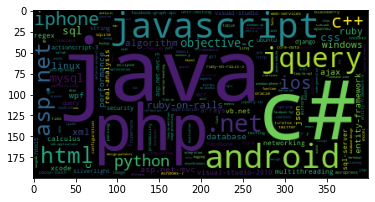

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
tup=dict(result.items())
tup
a=WordCloud(background_color='black').generate_from_frequencies(tup)
plt.imshow(a)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


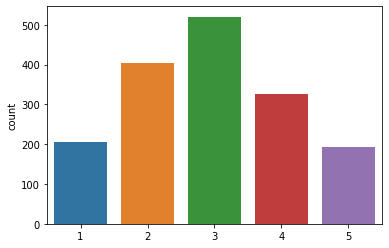

In [ ]:
import seaborn as sns
sns.countplot(tag_ques_count)

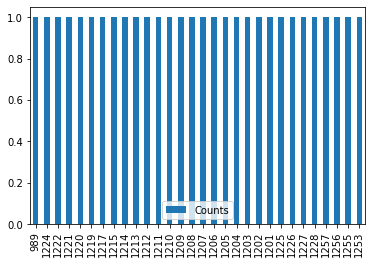

In [ ]:
tag_df.head(30).plot(kind='bar')
#plt.plot(x.head(30))
#sns.barplot(x.head(30))

In [ ]:
conn.close()

In [206]:
con5=sqlite3.connect('processed_db2')
writer=con5.cursor()
writer.execute("""CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, tags text);""")



In [217]:
con3=sqlite3.connect('train_no_dup')
reader=con3.cursor()
reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 1000000;")


In [213]:
import nltk 
import numpy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [210]:
stop_words=set(stopwords.words('english'))

In [ ]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")


In [216]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/


preprocessed_data_list=[]
reader.fetchone()
questions_proccesed=0

for row in reader:



    title, question, tags = row[0], row[1], row[2]


    question=re.sub('<code>(.*?)</code>', '', question)
    #question=striphtml(question)

    

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

   
    tup = (question,tags)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,tags) values (?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)


In [218]:
writer.execute("SELECT question From QuestionsProcessed LIMIT 10")
print("Questions after preprocessed")
print('='*100)
writer.fetchone()
for row in writer:
  print(row)
  print('-'*100)

Questions after preprocessed
('webbrows flicker selenium webdriv use selenium webdriv run ie webbrows flicker test fail solut issu work fine firefox actual web page flicker test case fail say element display',)
----------------------------------------------------------------------------------------------------
('capistrano multipl server refer current server deploy background capistrino run capistrano ext multistag deploy work expect ad array server role pre code instanc server com server com role web instanc code pre tri make deploy produc path base name server deploy like pre code set deploy lambda var www applic hostnam code pre work pretti well except server com server com actual host exampl instead two deploy folder base server name defin deploy stage rb file produc one var www applic server com dig around look way either inject capistrano level refer shell variabl would retain detail seem like need host applic server multipl instanc app would common realli need pre code set deplo

In [250]:
preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", con5)
preprocessed_data.head()

,question,tags
0,regist differ implement busi layer servic inte...,c# .net castle-windsor
1,webbrows flicker selenium webdriv use selenium...,selenium build-automation
2,capistrano multipl server refer current server...,capistrano
3,possibl creat daemon like process blackberri c...,blackberry daemon
4,look canon exampl overflow problem came interv...,c overflow


In [242]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 1643
number of dimensions : 2


In [243]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [244]:
multilabel_y

<1643x1975 sparse matrix of type '<class 'numpy.int64'>'
	with 4825 stored elements in Compressed Sparse Row format>

In [222]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    print(t)
    print('!'*100)
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    print(sorted_tags_i)
    print('!'*100)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    print(multilabel_yn)
    return multilabel_yn

def questions_explained_fn(n):       #doubts
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [223]:

questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

[7, 61, 4, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 12, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1, 20, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 85, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 2, 1, 1, 5, 1, 2, 2, 6, 8, 1, 2, 1, 1, 2, 1, 1, 1, 7, 1, 1, 1, 1, 2, 1, 1, 1, 1, 13, 2, 2, 1, 1, 1, 2, 55, 1, 1, 1, 17, 12, 1, 1, 1, 2, 1, 3, 1, 4, 3, 5, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 4, 1, 3, 1, 1, 1, 6, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 21, 127, 2, 3, 51, 1, 2, 2, 1, 2, 1, 3, 13, 2, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 6, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 3, 1, 2, 2, 1, 2, 2, 1, 1, 8, 7, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 4, 2, 1, 1, 1, 3, 1, 2, 2, 1, 2, 2, 5, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 2

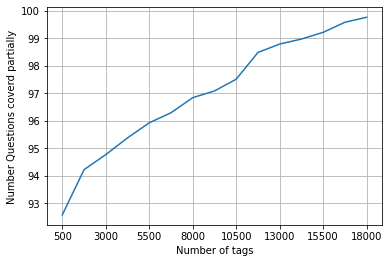

In [273]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
#print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [315]:
t=[1,2,2,2,3,3,8,8,9,7,6,4,2,7,34,11,34,65,67,90,87]
s = sorted(range(len(t)), key=lambda i: t[0])
print(len(t))                                                    
print(t)                                                          
e = sorted(range(len(t)))                                   
print(e)                                                          
print(s)
a = sorted(range(len(t)), key=lambda i: t[0],reverse=True)
print(a)

21
[1, 2, 2, 2, 3, 3, 8, 8, 9, 7, 6, 4, 2, 7, 34, 11, 34, 65, 67, 90, 87]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [312]:
t=[1,2,2,2,3,3,8,8,9,7,6,4,2,7,34,11,34,65,67,90,87]
s = sorted(range(len(t)), key=lambda i: t[i])
print(len(t))                                                    
print(t)                                                          
e = sorted(range(len(t)))                                   
print(e)                                                          
print(s)
a = sorted(range(len(t)), key=lambda i: t[i],reverse=True)
print(a)

21
[1, 2, 2, 2, 3, 3, 8, 8, 9, 7, 6, 4, 2, 7, 34, 11, 34, 65, 67, 90, 87]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 12, 4, 5, 11, 10, 9, 13, 6, 7, 8, 15, 14, 16, 17, 18, 20, 19]
[19, 20, 18, 17, 14, 16, 15, 8, 6, 7, 9, 13, 10, 11, 4, 5, 1, 2, 3, 12, 0]


In [237]:
t[2]

3

In [239]:
a=sorted(range(len(t)))
print(a)
b=sorted(range(len(t)),key=lambda i: t[i])
print(b)
#c=sorted(range(len(t)), key=lambda i: t[i], reverse=True)
#print(c)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 7, 2, 6, 5, 3, 4, 9, 8, 10, 11, 12, 14, 13]


In [249]:
multilabel_yx = tags_to_choose(10)

[7, 61, 3, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 12, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1, 20, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 85, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 2, 1, 1, 5, 1, 2, 2, 6, 8, 1, 2, 1, 1, 2, 1, 1, 1, 7, 1, 1, 1, 1, 2, 1, 1, 1, 1, 13, 2, 2, 1, 1, 1, 2, 55, 1, 1, 1, 17, 12, 1, 1, 1, 2, 1, 3, 1, 4, 3, 5, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 4, 1, 3, 1, 1, 1, 6, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 21, 127, 2, 3, 51, 1, 2, 2, 1, 2, 1, 3, 13, 2, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 6, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 3, 1, 2, 2, 1, 2, 2, 1, 1, 8, 7, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 4, 2, 1, 1, 1, 3, 1, 2, 2, 1, 2, 2, 5, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1

In [274]:
multilabel_yx.shape

(1643, 10)

In [275]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 1975
number of tags taken : 10 ( 0.5063291139240507 %)


In [266]:
total_size=preprocessed_data.shape[0]
train_size=int(0.8*total_size)
x_train=preprocessed_data[0:train_size]
x_test=preprocessed_data[train_size:total_size]
y_train=multilabel_yx[0:train_size,:]
y_test=multilabel_yx[train_size:total_size,:]


In [260]:
x_train.shape

(1314, 2)

In [262]:
x_test.shape

(329, 2)

In [253]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (1314, 10)
Number of data points in test data : (329, 10)


In [268]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])


In [269]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (1314, 199497) Y : (1314, 10)
Dimensions of test data X: (329, 199497) Y: (329, 10)


In [271]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score

In [272]:
# this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# This takes about 6-7 hours to run.
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))





accuracy : 0.668693009118541
macro f1 score : 0.3421934371934372
micro f1 scoore : 0.42975206611570244
hamming loss : 0.041945288753799395
Precision recall report :
               precision    recall  f1-score   support

           0       0.70      0.30      0.42        23
           1       0.57      0.14      0.23        28
           2       0.85      0.53      0.65        32
           3       0.64      0.39      0.49        23
           4       0.86      0.40      0.55        15
           5       0.62      0.31      0.42        16
           6       0.00      0.00      0.00        14
           7       1.00      0.50      0.67         8
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         4

   micro avg       0.74      0.30      0.43       172
   macro avg       0.52      0.26      0.34       172
weighted avg       0.61      0.30      0.40       172
 samples avg       0.15      0.14      0.14       172



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
